# Pure: Prediction Surface Uncertainty Quantification in Object Detection Models for Autonomous Driving

## Description
Object detection in autonomous vehicles is commonly based on camera images and Lidar inputs, which are often used to train prediction models such as deep artificial neural networks for decision making for object recognition, adjusting speed, etc. A mistake in such decision making can be damaging; thus, it is vital to measure the reliability of decisions made by such prediction models via uncertainty measurement. Uncertainty, in deep learning models, is often measured for classification problems. However, deep learning models in autonomous driving are often multi-output regression models. Hence, we propose a novel method called **PURE (Prediction sURface uncErtainty)** for measuring prediction uncertainty of such regression models. We formulate object recognition problem as a regression model with more than one outputs for finding object locations in a 2-dimensional camera view. For evaluation, we modified three widely-applied object recognition models (i.e., YoLo, SSD300 and SSD512) and used the KITTI, Stanford Cars, Berkeley Deep Drive, and NEXET datasets. Results showed the statistically significant negative correlation between prediction surface uncertainty and prediction accuracy suggesting that uncertainty significantly impacts the decisions made by autonomous driving. 

## System overview
![Process](https://raw.githubusercontent.com/Simula-COMPLEX/pure/main/desc_images/system-overview.png)

### 0. Setup the Environment
First, import the necessary package to run this notebook.

In [1]:
import util
from glob import glob
from IPython.display import Image,display
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

### 1. Explore the example input images
In this experiment, we used KITTI, Berkeley-BDD100K, Nexet and Stanford datasets. The example of the datasets:

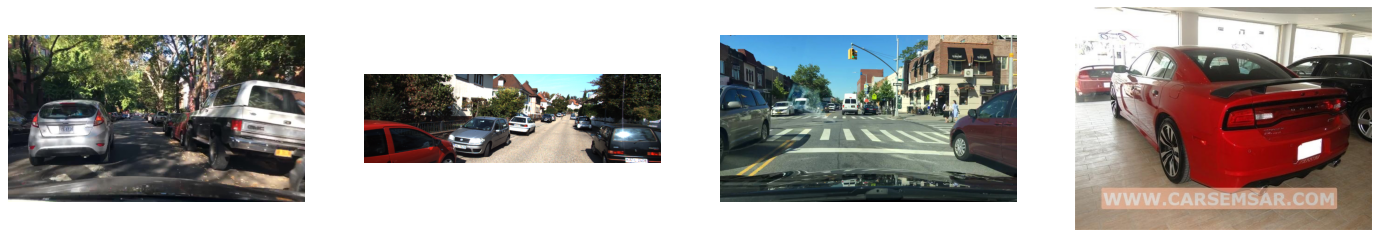

In [2]:
folders = ['Berkeley-BDD100K','KITTI','Nexet','Stanford']
image_types = ['jpg','png','jpg','jpg']
fig = figure(figsize=(22, 6))
i = 0
for folder_name, image_type in zip(folders,image_types):
    first_file = glob('images/' + folder_name + '/*.' + image_type)[0]
    a=fig.add_subplot(1,len(folders),i+1)
    image = imread(first_file)
    imshow(image,cmap='Greys_r')
    axis('off')
    i += 1

## 2. Object predictions with standard SSD300 model
In this Jupyter Notebook page, first we will make object predictions using standard (Unmodified) SDD300 model.
* **White boxes** show the ground truth information, 
* **Red boxes** show the object predictions.

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Instructions for updating:
Use fn_output_signature instead


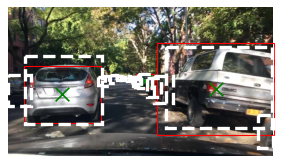

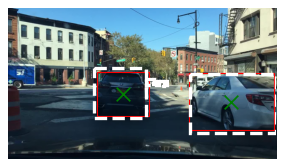

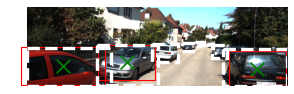

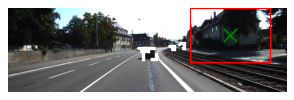

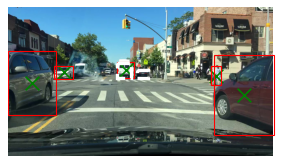

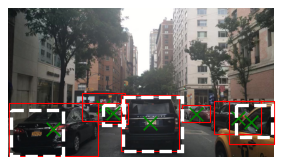

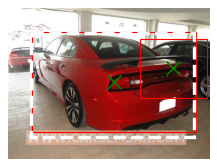

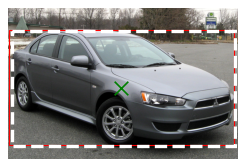

In [3]:
std_model = util.get_model(0.0, mc_dropout=False) # No dropout
folders = ['Berkeley-BDD100K','KITTI','Nexet','Stanford']
image_types = ['jpg','png','jpg','jpg']

for folder_name, image_type in zip(folders,image_types):
    for i in range(2):
        first_file = glob('images/' + folder_name + '/*.' + image_type)[i]
        util.get_pred_uncertainty(first_file,std_model,mc_dropout=False, T=1, 
                                  plot_ground_truth=True)

## 3. Object predictions with standard SSD300 model

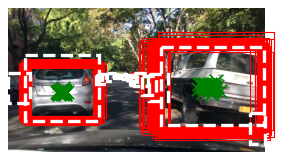

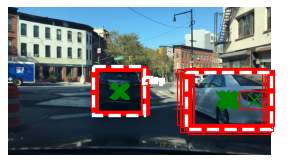

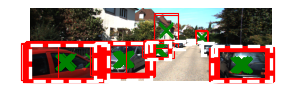

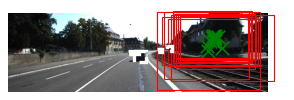

In [ ]:
# Dropout layers are activated with p=0.3
mc_dropout_model = util.get_model(0.3, mc_dropout=True) 

folders = ['Berkeley-BDD100K','KITTI','Nexet','Stanford']
image_types = ['jpg','png','jpg','jpg']

for folder_name, image_type in zip(folders,image_types):
    for i in range(2):
        first_file = glob('images/' + folder_name + '/*.' + image_type)[i]
        util.get_pred_uncertainty(first_file,mc_dropout_model,
                                  mc_dropout=True, T=50, 
                                  plot_ground_truth=True)